# split des commentaires en phrases
- plusieurs th√®mes/topics possibles par commentaires
- s√©quences moins longues et plus faciles √† comparer

In [16]:
import data_loader

dataset = data_loader.Data(sample_size=10000)

# embedding du corpus

In [27]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')
#model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

corpus_embeddings = model.encode(dataset.sentences_df['sentence'].to_numpy(), convert_to_tensor=True)

In [28]:
# TODO save/read to local file

# semantic search

In [29]:
def search(queries, top_k=10):
    queries_embeddings = model.encode(queries, convert_to_tensor=True)
    results = util.semantic_search(queries_embeddings, corpus_embeddings, top_k=top_k)
    for q, query_results in enumerate(results):
        print(queries) if isinstance(queries, str) else print(queries[q])
        print('--------------')
        for result in query_results:
            idx = result['corpus_id']
            score = round(result['score'],4)
            print(score, '¬†|¬†',dataset.sentences_df['sentence'].iloc[idx])
        print('\n')
        

In [30]:
search(['probl√®me de livraison', "article arriv√© cass√©"], top_k=20)

probl√®me de livraison
--------------
0.9924 ¬†|¬† Probl√®mes de livraison.
0.9921 ¬†|¬† √ânormes probl√®mes de livraison .
0.9914 ¬†|¬† Probl√®me sur la livraison.
0.9863 ¬†|¬† Invoquant des probl√®mes de livraisons.
0.9847 ¬†|¬† Trop de probl√®me de livraison.
0.9838 ¬†|¬† plusieurs probl√®mes de livraison..
0.9642 ¬†|¬† Plus de probl√®mes de livraison.
0.9642 ¬†|¬† Incomp√©tent  pour la livraison.
0.9631 ¬†|¬† De plus, j'ai √©galement des probl√®mes avec la livraison.
0.9598 ¬†|¬† Probl√®me avec une livraison de colis .
0.9584 ¬†|¬† Leur service n'est pas fiable, et je peux vous dire que quand on est professionnel et qu'on doit planifier les livraisons, cela est extr√™mement pr√©occupant.
0.9568 ¬†|¬† Cdiscount  a un probleme avec ses livraisons.
0.9565 ¬†|¬† Service de livraison d√©plorable.
0.9535 ¬†|¬† je suis oblig√© de recommander l'article : probl√®me de gestion Tre√©s d√©sagr√©ableretarde la livraison
0.9531 ¬†|¬† frais de gestion impr√©vus
0.9505 ¬†|¬† Le service de livraiso

In [31]:
# let's try framing the query to be more "symetric" as MSMARCO type of models (Q&A) not available in French
queries=[
    "Aujourd‚Äôhui rebelote, livraison effectu√©e dans la bo√Æte aux lettres sans m√™me sonner.",
    "Cet appareil n‚Äôa jamais fonctionn√©.",
    "Franchement d√©√ßue d'Amazon."
]
search(queries, top_k=20)




Aujourd‚Äôhui rebelote, livraison effectu√©e dans la bo√Æte aux lettres sans m√™me sonner.
--------------
0.9618 ¬†|¬† Service client nul et pas comp√©tent, commande marqu√© d√©pos√© boute aux lettres mais rien, remboursement tardif, bref une boite √† exploser
0.9618 ¬†|¬† Service client nul et pas comp√©tent, commande marqu√©  d√©pos√© boute aux lettres mais rien, remboursement tardif, bref une boite √† exploser
0.9566 ¬†|¬† Commande effectu√©e, colis marqu√© comme livr√© alors que je n'ai rien re√ßu.
0.9536 ¬†|¬† (Soit disant) Le jour-j aucune commande de livr√©e !
0.953 ¬†|¬† Donc le surlendemain mail pour me dire que colis va √™tre livr√©, en appelant j'apprend que soci√©t√© o√π se trouve le colis, ils ne livrent pas de toutes fa√ßons !
0.9528 ¬†|¬† colis marqu√© livr√© mais jamais re√ßu!
0.9509 ¬†|¬† Un √©tait tellement abim√© que la Poste a retourn√© par elle m√™me (manquement d'emballage de votre c√¥te?).
0.9505 ¬†|¬† Colis re√ßu mais.... Ouvert dans la boite au lettre et compl√

In [32]:
# TODO check if I can combine french with MS marco for better "asymetric search"
# https://www.sbert.net/examples/training/ms_marco/multilingual/README.html

# clustering 
https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/clustering/fast_clustering.py

## fast clustering (hierarchical)

> TODO : comment ignorer certains crit√®res de silimlarit√© ? une forme de fature extraction ? (par exemple √©viter de regrouper sur les noms d'entreprises ou sur "service client")

In [33]:
clusters = util.community_detection(corpus_embeddings, min_community_size=100, threshold=0.95)

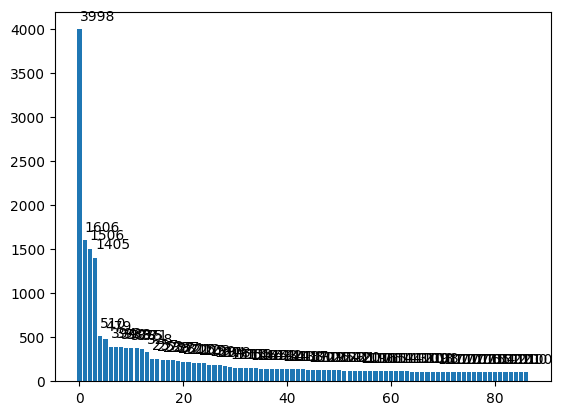

In [34]:
# Distribution
import matplotlib.pyplot as plt
import pandas as pd
hierarchical_clusters_chart = pd.DataFrame(clusters).transpose()
hierarchical_clusters_chart = hierarchical_clusters_chart.count(axis=0)
plt.bar(x=hierarchical_clusters_chart.index,height=hierarchical_clusters_chart.values)
for i in range(hierarchical_clusters_chart.shape[0]):
    plt.text(hierarchical_clusters_chart.index[i], hierarchical_clusters_chart.values[i] + 100, str(round(hierarchical_clusters_chart.values[i], 2)), fontsize=10)
plt.show();


In [37]:
# Print for all clusters the top_k and bottom top_k elements
top_k=10
for i, cluster in enumerate(clusters):
    print("\n\nCluster {}, #{} Elements ".format(i + 1, len(cluster)), '\n------')
    for sentence_id in cluster[0:top_k]:
        print("\t", dataset.sentences_df['sentence'].iloc[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-top_k:]:
        print("\t", dataset.sentences_df['sentence'].iloc[sentence_id])



Cluster 1, #3998 Elements  
------
	 Je voulais seulement un bordereau d‚Äôenvoi pour renvoyer la paire et un remboursement impossible de me faire entendre les frais doivent √™tre de ma poche... le service client quant √† lui ne comprend toujours pas mon soucis et me demande encore si j‚Äôai re√ßue ma paire .. de plus mon commentaire sur cdiscount n‚Äôa pas √©tait accept√© .. bref catastrophique !
	 08), je re√ßois un mail me disant qu'ils sont d√©sol√©s car pas en mesure d'honorer la livraison et qu'ils enverraient mon colis plus tard... et toujours pas moyen de rentrer en contact avec eux... donc je ne sait pas si je verrai arriver mon colis un jour, mais en attendant m√©fiez vous de Cdiscount ils vous app√¢tent facilement, encaissent facilement votre argent (pas de remboursement, juste bon achats souvent non valides)  mais vous n‚Äô√™tes vraiment pas sur de voir arriver vos colis.
	 Ils me r√©pondent qu'ils ne savent pas pourquoi le colis leur a √©t√© renvoy√© et me propose un rem

## k-means

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 10
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings.cpu().numpy())


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


KMeans(n_clusters=10)

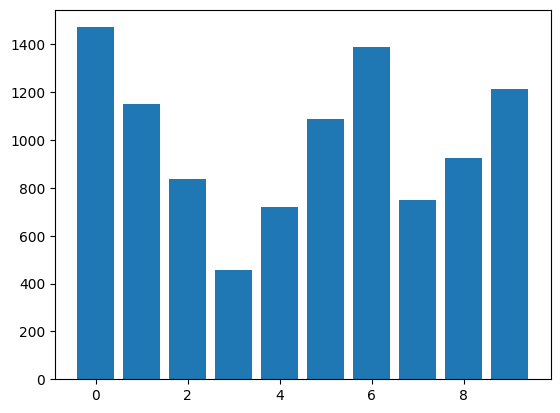

In [ ]:
# distribution
km_cluster_assignment = clustering_model.labels_
km_cluster_assignment = pd.DataFrame(km_cluster_assignment)
km_cluster_assignment = km_cluster_assignment.rename(columns={0: "labels"})
km_cluster_assignment = km_cluster_assignment.value_counts()
km_cluster_assignment = km_cluster_assignment.reset_index(drop=False)
plt.bar(x=km_cluster_assignment["labels"], height=km_cluster_assignment["count"])
plt.show();


In [ ]:
# Print for all clusters the top_k and bottom top_k elements
top_k=10

km_clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(clustering_model.labels_):
    km_clustered_sentences[cluster_id].append(sentence_id)

for i, cluster in enumerate(km_clustered_sentences):
    print("\nCluster {}, #{} Elements ".format(i + 1, len(cluster)))
    for sentence_id in cluster[0:top_k]:
        print("\t", dataset.sentences_df['sentence'].iloc[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-top_k:]:
        print("\t", dataset.sentences_df['sentence'].iloc[sentence_id])


Cluster 1, #1472 Elements 
	 Tr√®s mauvais service, plus de 600 ‚Ç¨ d√©pens√©s, livraison promise hier et commande encore pas trait√©e !
	 Trop de frais pour l'exp√©dition.
	 Vendredi dernier on me dit que j'aurai eu mon remboursement dans 72h.
	 Ne vaut m√™me pas 1 √©toile... Pr√©l√®vement de 29 euros en mars 2020.
	 On t'arnaque avec un produit cher qui s‚Äôarr√™tera de fonctionner dans quelques mois, ensuite oublies la garantie par-ce que ils vont juste s'arranger entre eux pour limiter leurs d√©g√¢ts et sans doute c'est le client qui paie le prix cher.
	 J'ai effectu√© un paiement en 4x fois sans frais.
	 J'ai donc pay√© un objet qu'un illustre inconnu a re√ßu √† ma place gratuitement et Cdiscount ne me rembourse pas et reste muet √† mes r√©clamations.
	 je vais m'empresser d'utiliser ces 2 euros de bon et racheter √† la Fnac qui vient de m'arnaquer d'un livre √† 12 euros et de 2 appels t√©l√©phoniques SURTAXE de 30 min √† 15 Euros-C'est "du foutage de g...."???
	 Y‚Äôa quelques s

# Topic modelling

In [ ]:
# BERT Topics and all ? --> if the sentence embeddings are not great, what's the point ?

# other sentence transformers/embeddings and finetuning ?
- Doc2vec ?
- Universal Sentence Encoder ?

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

# supervised and finetuning
- finetuning to the task ?

